Algoritmo Kmeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation

In [2]:
# Cargar el dataset
df = pd.read_csv('Dataset_Loja_Preprocesado.csv')

--- 1. ANÁLISIS DE VARIANZA ---


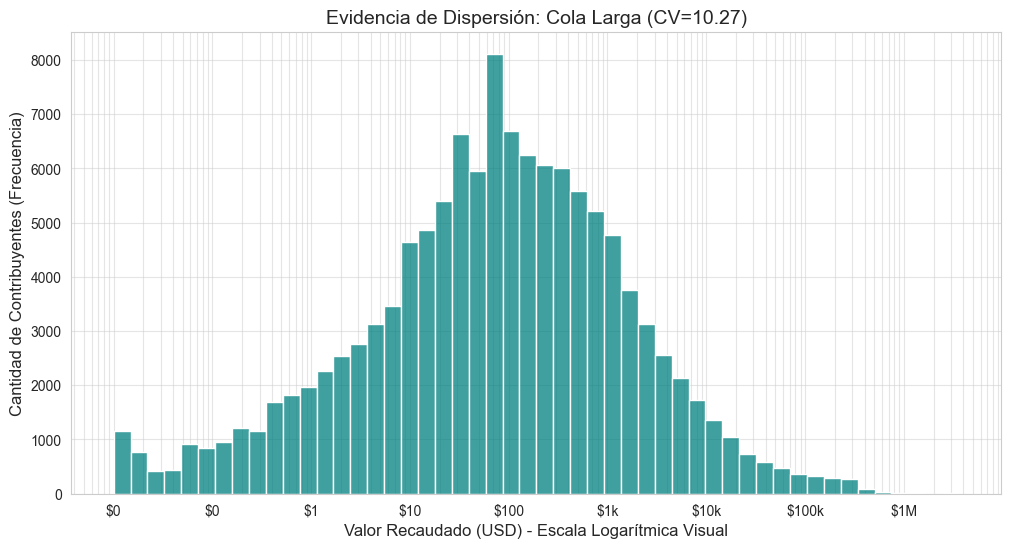


--- 2. ANÁLISIS DE CARDINALIDAD ---
Dimensiones necesarias para Actividad Económica: 23
Dimensiones necesarias para Cluster Geo: 2


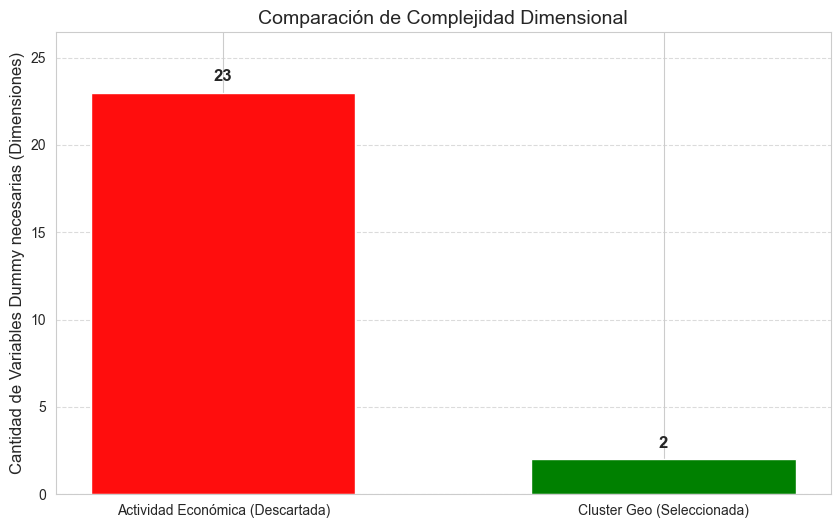

--- 3. ANÁLISIS DE CONCENTRACIÓN DE RIQUEZA ---


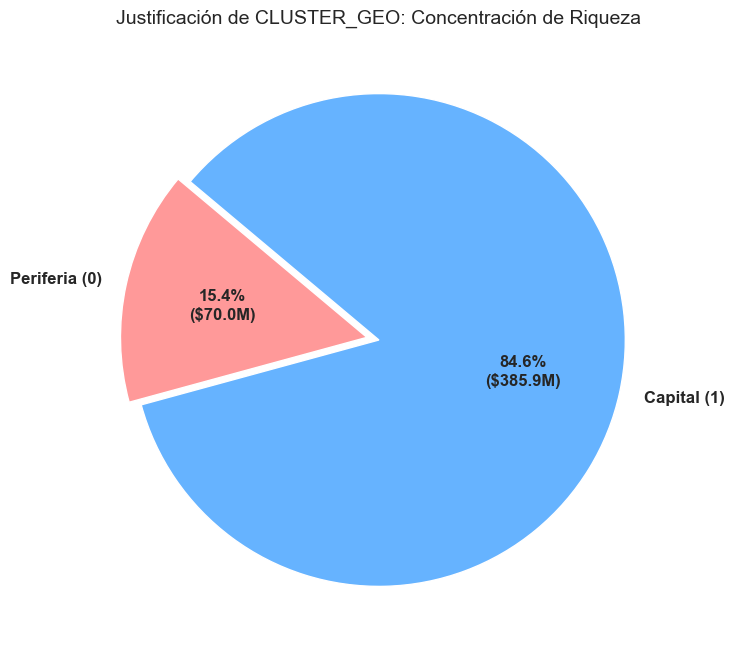

CLUSTER_GEO
0    6.998270e+07
1    3.859063e+08
Name: VALOR_RECAUDADO, dtype: float64

--- 4. ANÁLISIS DE JERARQUÍA (CON MEDIANAS) ---


C:\Users\santi\AppData\Local\Temp\ipykernel_7020\2158410229.py:132: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(x='TIPO_COD_TEST', y='VALOR_RECAUDADO', data=df,
C:\Users\santi\AppData\Local\Temp\ipykernel_7020\2158410229.py:156: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['NO TIENE\n(0)', 'PERSONAS NATURALES\n(1)', 'SOCIEDADES\n(2)'])


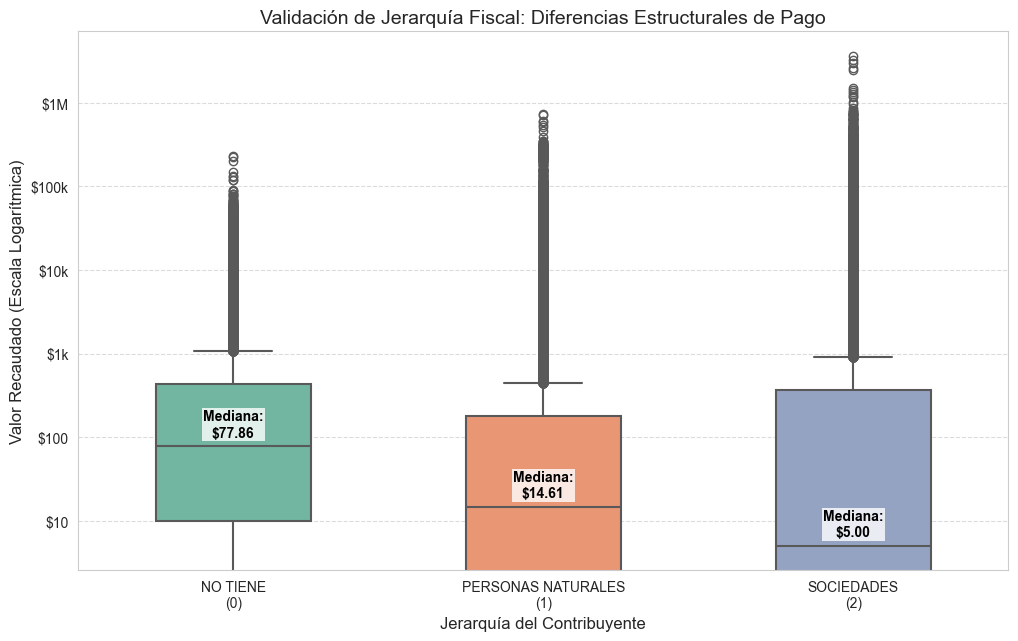

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import variation
import matplotlib.ticker as ticker # Importante para formatear los ejes

# Configuración estética
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Función auxiliar para que los ejes muestren dinero real ($1k, $1M)
def formatear_eje_dinero(x, pos):
    if x >= 1e6:
        return f'${x*1e-6:.0f}M'
    elif x >= 1e3:
        return f'${x*1e-3:.0f}k'
    return f'${x:.0f}'

# =============================================================================
# 1. HISTOGRAMA MEJORADO (VALOR_RECAUDADO)
# =============================================================================
print("--- 1. ANÁLISIS DE VARIANZA ---")
cv = variation(df['VALOR_RECAUDADO'])

plt.figure(figsize=(12, 6))
# Usamos log_scale=True para la forma, pero cambiaremos las etiquetas luego
ax = sns.histplot(df['VALOR_RECAUDADO'], bins=50, log_scale=True, color='teal')

# --- AQUÍ ESTÁ EL TRUCO PARA LOS EJES ---
# Forzamos al eje X a usar nuestro formateador personalizado
ax.xaxis.set_major_formatter(ticker.FuncFormatter(formatear_eje_dinero))

plt.title(f'Evidencia de Dispersión: Cola Larga (CV={cv:.2f})', fontsize=14)
plt.xlabel('Valor Recaudado (USD) - Escala Logarítmica Visual', fontsize=12)
plt.ylabel('Cantidad de Contribuyentes (Frecuencia)', fontsize=12)
plt.grid(True, which="both", ls="-", alpha=0.5) # Grid más suave
plt.show()

# =============================================================================
# 2. GRÁFICO DE BARRAS: Comparación de Dimensionalidad (Maldición de la Dimensionalidad)
# =============================================================================
print("\n--- 2. ANÁLISIS DE CARDINALIDAD ---")

# 1. Calculamos la cardinalidad (cuántas columnas nuevas crearía cada variable)
# Asumimos que 'DESCRIPCION_ACT_ECONOMICA' es la variable de alta cardinalidad
cardinalidad_actividad = df['DESCRIPCION_ACT_ECONOMICA'].nunique()
cardinalidad_geo = df['CLUSTER_GEO'].nunique()

print(f"Dimensiones necesarias para Actividad Económica: {cardinalidad_actividad}")
print(f"Dimensiones necesarias para Cluster Geo: {cardinalidad_geo}")

# 2. Configuración del gráfico
plt.figure(figsize=(10, 6))

# Definimos datos y colores (Rojo = "Malo/Costoso", Verde = "Bueno/Eficiente")
etiquetas = ['Actividad Económica (Descartada)', 'Cluster Geo (Seleccionada)']
valores = [cardinalidad_actividad, cardinalidad_geo]
colores = ['#FF0D0D', '#008000'] # Rojo vibrante y Verde estándar

# Crear barras
bars = plt.bar(etiquetas, valores, color=colores, width=0.6)

# 3. Añadir etiquetas de valor encima de las barras (Annotations)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Títulos y ejes
plt.title('Comparación de Complejidad Dimensional', fontsize=14)
plt.ylabel('Cantidad de Variables Dummy necesarias (Dimensiones)', fontsize=12)
plt.ylim(0, max(valores) * 1.15) # Dar un poco de aire arriba para que quepa el número
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# =============================================================================
# 3. ANÁLISIS MEJORADO: Dinero (USD) vs. Operatividad (Registros)
# =============================================================================
# Configuración estética
sns.set_style("whitegrid")

# --- 3. JUSTIFICACIÓN DE CLUSTER_GEO (CON MONTOS REALES) ---
print("--- 3. ANÁLISIS DE CONCENTRACIÓN DE RIQUEZA ---")

# Calculamos la suma total por cluster
data_pie = df.groupby('CLUSTER_GEO')['VALOR_RECAUDADO'].sum()

# Función mágica para mostrar % y Millones de Dólares al mismo tiempo
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        # Formateamos a Millones (M)
        return '{p:.1f}%\n(${v:.1f}M)'.format(p=pct, v=val/1e6)
    return my_autopct

# Colores similares a tu imagen (Azul y Salmón)
colors = ['#ff9999','#66b3ff'] # 0=Periferia (Salmón), 1=Capital (Azul)

plt.figure(figsize=(8, 8))
plt.pie(data_pie, 
        labels=['Periferia (0)', 'Capital (1)'], 
        autopct=make_autopct(data_pie), # Aquí usamos la función personalizada
        startangle=140, 
        colors=colors, 
        explode=(0.05, 0), # Separamos un poco para efecto visual
        textprops={'fontsize': 12, 'weight': 'bold'}) # Texto más grande y negrita

plt.title('Justificación de CLUSTER_GEO: Concentración de Riqueza', fontsize=14)
plt.show()

# Imprimir los valores exactos para que los copies en el texto
print(data_pie)

# =============================================================================
# 4. BOXPLOT MEJORADO: Jerarquía Fiscal con Etiquetas de Mediana
# =============================================================================
print("\n--- 4. ANÁLISIS DE JERARQUÍA (CON MEDIANAS) ---")

# Aseguramos el mapeo numérico
mapeo_tipo = {'NO TIENE': 0, 'PERSONAS NATURALES': 1, 'SOCIEDADES': 2}
if 'TIPO_COD_TEST' not in df.columns:
    df['TIPO_COD_TEST'] = df['TIPO_CONTRIBUYENTE'].map(mapeo_tipo)

plt.figure(figsize=(12, 7))

# Crear el Boxplot
# Usamos width=0.5 para que las cajas no sean tan anchas y se vean elegantes
ax2 = sns.boxplot(x='TIPO_COD_TEST', y='VALOR_RECAUDADO', data=df, 
                  palette="Set2", width=0.5, linewidth=1.5, showfliers=True)

# Escala Logarítmica y Formato de Dinero
ax2.set_yscale('log')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(formatear_eje_dinero))

# --- AGREGAR EL VALOR DE LA MEDIANA (Línea Central) ---
# Calculamos las medianas por grupo para poner el texto
medianas = df.groupby('TIPO_COD_TEST')['VALOR_RECAUDADO'].median()

# Iteramos sobre cada caja para escribir el valor
for i, mediana in enumerate(medianas):
    # Texto con fondo blanco para que se lea bien
    ax2.text(i, mediana * 1.3, f'Mediana:\n${mediana:.2f}', 
             horizontalalignment='center', size=10, weight='bold', color='black',
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

# Títulos y Etiquetas Explicativas
plt.title('Validación de Jerarquía Fiscal: Diferencias Estructurales de Pago', fontsize=14)
plt.xlabel('Jerarquía del Contribuyente', fontsize=12)
plt.ylabel('Valor Recaudado (Escala Logarítmica)', fontsize=12)

# Personalizar el eje X para que diga los nombres, no solo 0, 1, 2
ax2.set_xticklabels(['NO TIENE\n(0)', 'PERSONAS NATURALES\n(1)', 'SOCIEDADES\n(2)'])

plt.grid(True, which="major", axis='y', linestyle='--', alpha=0.7)
plt.show()